# Topic model estimation

In this notebook, I estimate the LDA model using Stephen Hansen's [`topic-modelling-tools`](https://www.dropbox.com/s/gxkqgjwc50qjtg5/topic-modelling-tools-with_gsl.zip?dl=0). I start by loading the pre-processed articles from the train set which were prepared in a prior step using the `Pre-processing (train data)` notebook.

In [1]:
from datetime import datetime
startTime = datetime.now()
import pickle

with open('stems_for_lda_train.pkl', 'rb') as f:
    stems_train = pickle.load(f)
    
print stems_train[0]
print datetime.now() - startTime

[u'schalck', u'milliardenkredit', u'sichert', u'zahlungsfah', u'ex', u'ddr', u'darstell', u'devisenbeschaff', u'ehemaligen_ddr', u'schalck', u'golodkowski', u'josef_strau\xdf', u'eingefadelt', u'milliardenkredit', u'erstmal', u'zahlungsfah', u'ddr', u'aufrechterhalt', u'interview', u'ard', u'abend', u'ausgestrahlt', u'schalck', u'angaben_des_senders', u'freies', u'sfb', u'damal', u'nichtsein', u'ddr', u'gegang', u'geword', u'damal', u'ddr', u'kooperation', u'bundesrepubl', u'uberleb', u'parteichef', u'erich_honecker', u'berat', u'konterrevolutionar', u'zuruckgewies', u'ablehn', u'sowjet', u'staatsprasident', u'michail_gorbatschows', u'beigetrag', u'lebenswicht', u'adern', u'sowjetunion', u'durchschnitt', u'alt', u'angeregt', u'schalck', u'golodkowski', u'sfb', u'bedingungslos', u'syst', u'gedient', u'schalck', u'wies', u'interview', u'vorwurf', u'rahm', u'jahrzehntelang', u'arbeit', u'leiter_der_abteilung', u'kommerziell', u'koordinier', u'koko', u'kriminell', u'tatig', u'begang', u'sc

## Estimating LDA

I initialize an LDA object using the LDA class. I pass a list of stems as an input. The model is set to estimate 200 topics.

In [2]:
startTime = datetime.now()
import topicmodels
ldaobj = topicmodels.LDA.LDAGibbs(stems_train, 200)
print datetime.now() - startTime

0:03:45.601000


There are three attributes of ldaobj:
    
1. The number of topics, K.
2. The hyperparameter $\alpha$ for the Dirichlet prior of $\theta_d$, document-specific topic proportions.
3. The hyperparameter $\eta$ for the Dirichlet prior of $\beta_k$, topic-specific vocabulary distributions.

As per the methodology proposed by Griffiths and Steyvers in their 2004 paper, the values for $\alpha$ and $\eta$ are determined by the following ratios:

$\alpha = 50/K$

$\eta = 200/V$

In [3]:
# Prints the user-defined number of topics in the LDA model.
print(ldaobj.K) 
# Prints the automatically determined hyperparameter alpha, which controls the document-specific topic distributions in the LDA model.
print(ldaobj.alpha)
# Prints the automatically determined hyperparameter eta, which controls the topic-specific vocabulary distributions in the LDA model.
print(ldaobj.beta)

200
0.25
0.000410919782295


Topic assignment variables $z$ are initialized randomly to the values in $\{1,...,K\}$ by drawing $z_{n,d}$ from a uniform distribution.

In [4]:
print ldaobj.topic_seed[:10]
print ldaobj.topic_seed.shape

[112  69 105  91  14  93 186  16 126  84]
(255700386L,)


Now I am ready to sample.

500 is the number of burn-in iterations;
50 is a thinning interval;
10 is the number of samples to take.

To manage computational resources, I will only keep a maximum of 11 samples in memory at any given time.

In [5]:
import numpy as np

startTime = datetime.now()

ldaobj.sample(500,50,10)

perplexity_1000 = ldaobj.perplexity()

print perplexity_1000

# Starting point
start_iteration = 550 

# Step size
step = 50

# Calculate the number of steps
n_steps = len(perplexity_1000)

# Generate the iterations list
iterations = list(range(start_iteration, start_iteration + step*n_steps, step))

# Convert both lists to numpy arrays
iterations = np.array(iterations)

perplexity_1000 = np.array(perplexity_1000)

# Create a structured array
performance = np.zeros(len(perplexity_1000), dtype=[('iteration', 'i4'), ('perplexity', 'f8')])

# Assign values to the structured array
performance['iteration'] = iterations
performance['perplexity'] = perplexity_1000

# Save the structured array to a CSV file
np.savetxt("perplexity.csv", performance, delimiter=";", fmt=['%d', '%10.5f'], header="Iteration;Perplexity", comments='', encoding='utf-8-sig')

# Save the model
from sklearn.externals import joblib

filename = 'estimated_lda.sav'
joblib.dump(ldaobj, filename, compress=True) 

# Keep the last sample to save memory
ldaobj.samples_keep(1)

print datetime.now() - startTime

Iteration 1 of (collapsed) Gibbs sampling
Iteration 2 of (collapsed) Gibbs sampling
Iteration 3 of (collapsed) Gibbs sampling
Iteration 4 of (collapsed) Gibbs sampling
Iteration 5 of (collapsed) Gibbs sampling
Iteration 6 of (collapsed) Gibbs sampling
Iteration 7 of (collapsed) Gibbs sampling
Iteration 8 of (collapsed) Gibbs sampling
Iteration 9 of (collapsed) Gibbs sampling
Iteration 10 of (collapsed) Gibbs sampling
Iteration 11 of (collapsed) Gibbs sampling
Iteration 12 of (collapsed) Gibbs sampling
Iteration 13 of (collapsed) Gibbs sampling
Iteration 14 of (collapsed) Gibbs sampling
Iteration 15 of (collapsed) Gibbs sampling
Iteration 16 of (collapsed) Gibbs sampling
Iteration 17 of (collapsed) Gibbs sampling
Iteration 18 of (collapsed) Gibbs sampling
Iteration 19 of (collapsed) Gibbs sampling
Iteration 20 of (collapsed) Gibbs sampling
Iteration 21 of (collapsed) Gibbs sampling
Iteration 22 of (collapsed) Gibbs sampling
Iteration 23 of (collapsed) Gibbs sampling
Iteration 24 of (col

Iteration 201 of (collapsed) Gibbs sampling
Iteration 202 of (collapsed) Gibbs sampling
Iteration 203 of (collapsed) Gibbs sampling
Iteration 204 of (collapsed) Gibbs sampling
Iteration 205 of (collapsed) Gibbs sampling
Iteration 206 of (collapsed) Gibbs sampling
Iteration 207 of (collapsed) Gibbs sampling
Iteration 208 of (collapsed) Gibbs sampling
Iteration 209 of (collapsed) Gibbs sampling
Iteration 210 of (collapsed) Gibbs sampling
Iteration 211 of (collapsed) Gibbs sampling
Iteration 212 of (collapsed) Gibbs sampling
Iteration 213 of (collapsed) Gibbs sampling
Iteration 214 of (collapsed) Gibbs sampling
Iteration 215 of (collapsed) Gibbs sampling
Iteration 216 of (collapsed) Gibbs sampling
Iteration 217 of (collapsed) Gibbs sampling
Iteration 218 of (collapsed) Gibbs sampling
Iteration 219 of (collapsed) Gibbs sampling
Iteration 220 of (collapsed) Gibbs sampling
Iteration 221 of (collapsed) Gibbs sampling
Iteration 222 of (collapsed) Gibbs sampling
Iteration 223 of (collapsed) Gib

Iteration 428 of (collapsed) Gibbs sampling
Iteration 429 of (collapsed) Gibbs sampling
Iteration 430 of (collapsed) Gibbs sampling
Iteration 431 of (collapsed) Gibbs sampling
Iteration 432 of (collapsed) Gibbs sampling
Iteration 433 of (collapsed) Gibbs sampling
Iteration 434 of (collapsed) Gibbs sampling
Iteration 435 of (collapsed) Gibbs sampling
Iteration 436 of (collapsed) Gibbs sampling
Iteration 437 of (collapsed) Gibbs sampling
Iteration 438 of (collapsed) Gibbs sampling
Iteration 439 of (collapsed) Gibbs sampling
Iteration 440 of (collapsed) Gibbs sampling
Iteration 441 of (collapsed) Gibbs sampling
Iteration 442 of (collapsed) Gibbs sampling
Iteration 443 of (collapsed) Gibbs sampling
Iteration 444 of (collapsed) Gibbs sampling
Iteration 445 of (collapsed) Gibbs sampling
Iteration 446 of (collapsed) Gibbs sampling
Iteration 447 of (collapsed) Gibbs sampling
Iteration 448 of (collapsed) Gibbs sampling
Iteration 449 of (collapsed) Gibbs sampling
Iteration 450 of (collapsed) Gib

Iteration 640 of (collapsed) Gibbs sampling
Iteration 641 of (collapsed) Gibbs sampling
Iteration 642 of (collapsed) Gibbs sampling
Iteration 643 of (collapsed) Gibbs sampling
Iteration 644 of (collapsed) Gibbs sampling
Iteration 645 of (collapsed) Gibbs sampling
Iteration 646 of (collapsed) Gibbs sampling
Iteration 647 of (collapsed) Gibbs sampling
Iteration 648 of (collapsed) Gibbs sampling
Iteration 649 of (collapsed) Gibbs sampling
Iteration 650 of (collapsed) Gibbs sampling
Iteration 651 of (collapsed) Gibbs sampling
Iteration 652 of (collapsed) Gibbs sampling
Iteration 653 of (collapsed) Gibbs sampling
Iteration 654 of (collapsed) Gibbs sampling
Iteration 655 of (collapsed) Gibbs sampling
Iteration 656 of (collapsed) Gibbs sampling
Iteration 657 of (collapsed) Gibbs sampling
Iteration 658 of (collapsed) Gibbs sampling
Iteration 659 of (collapsed) Gibbs sampling
Iteration 660 of (collapsed) Gibbs sampling
Iteration 661 of (collapsed) Gibbs sampling
Iteration 662 of (collapsed) Gib

Iteration 827 of (collapsed) Gibbs sampling
Iteration 828 of (collapsed) Gibbs sampling
Iteration 829 of (collapsed) Gibbs sampling
Iteration 830 of (collapsed) Gibbs sampling
Iteration 831 of (collapsed) Gibbs sampling
Iteration 832 of (collapsed) Gibbs sampling
Iteration 833 of (collapsed) Gibbs sampling
Iteration 834 of (collapsed) Gibbs sampling
Iteration 835 of (collapsed) Gibbs sampling
Iteration 836 of (collapsed) Gibbs sampling
Iteration 837 of (collapsed) Gibbs sampling
Iteration 838 of (collapsed) Gibbs sampling
Iteration 839 of (collapsed) Gibbs sampling
Iteration 840 of (collapsed) Gibbs sampling
Iteration 841 of (collapsed) Gibbs sampling
Iteration 842 of (collapsed) Gibbs sampling
Iteration 843 of (collapsed) Gibbs sampling
Iteration 844 of (collapsed) Gibbs sampling
Iteration 845 of (collapsed) Gibbs sampling
Iteration 846 of (collapsed) Gibbs sampling
Iteration 847 of (collapsed) Gibbs sampling
Iteration 848 of (collapsed) Gibbs sampling
Iteration 849 of (collapsed) Gib

In [6]:
startTime = datetime.now()

ldaobj.sample(0,50,10)

perplexity_1500 = ldaobj.perplexity()

print perplexity_1500

# Retain only the perplexity values corresponding to the final 10 samples
perplexity_1500 = perplexity_1500[1:]

# Starting point
start_iteration = 1050 

# Step size
step = 50

# Calculate the number of steps
n_steps = len(perplexity_1500)

# Generate the iterations list
iterations = list(range(start_iteration, start_iteration + step*n_steps, step))

# Combine iterations and perplexity values
new_performance = np.column_stack((iterations, perplexity_1500))

# Load the existing performance data
existing_performance = np.genfromtxt("perplexity.csv", delimiter=";", skip_header=1)

# Combine existing performance with new performance
combined_performance = np.vstack((existing_performance, new_performance))

# Save the combined perplexity values
np.savetxt("perplexity.csv", combined_performance, delimiter = ";", fmt=['%d', '%10.5f'], header="Iteration;Perplexity", comments='', encoding='utf-8-sig')

# Save the model
filename = 'estimated_lda.sav'
joblib.dump(ldaobj, filename, compress=True) 

# Keep the last sample to save memory
ldaobj.samples_keep(1)

print datetime.now() - startTime

Iteration 1 of (collapsed) Gibbs sampling
Iteration 2 of (collapsed) Gibbs sampling
Iteration 3 of (collapsed) Gibbs sampling
Iteration 4 of (collapsed) Gibbs sampling
Iteration 5 of (collapsed) Gibbs sampling
Iteration 6 of (collapsed) Gibbs sampling
Iteration 7 of (collapsed) Gibbs sampling
Iteration 8 of (collapsed) Gibbs sampling
Iteration 9 of (collapsed) Gibbs sampling
Iteration 10 of (collapsed) Gibbs sampling
Iteration 11 of (collapsed) Gibbs sampling
Iteration 12 of (collapsed) Gibbs sampling
Iteration 13 of (collapsed) Gibbs sampling
Iteration 14 of (collapsed) Gibbs sampling
Iteration 15 of (collapsed) Gibbs sampling
Iteration 16 of (collapsed) Gibbs sampling
Iteration 17 of (collapsed) Gibbs sampling
Iteration 18 of (collapsed) Gibbs sampling
Iteration 19 of (collapsed) Gibbs sampling
Iteration 20 of (collapsed) Gibbs sampling
Iteration 21 of (collapsed) Gibbs sampling
Iteration 22 of (collapsed) Gibbs sampling
Iteration 23 of (collapsed) Gibbs sampling
Iteration 24 of (col

Iteration 192 of (collapsed) Gibbs sampling
Iteration 193 of (collapsed) Gibbs sampling
Iteration 194 of (collapsed) Gibbs sampling
Iteration 195 of (collapsed) Gibbs sampling
Iteration 196 of (collapsed) Gibbs sampling
Iteration 197 of (collapsed) Gibbs sampling
Iteration 198 of (collapsed) Gibbs sampling
Iteration 199 of (collapsed) Gibbs sampling
Iteration 200 of (collapsed) Gibbs sampling
Iteration 201 of (collapsed) Gibbs sampling
Iteration 202 of (collapsed) Gibbs sampling
Iteration 203 of (collapsed) Gibbs sampling
Iteration 204 of (collapsed) Gibbs sampling
Iteration 205 of (collapsed) Gibbs sampling
Iteration 206 of (collapsed) Gibbs sampling
Iteration 207 of (collapsed) Gibbs sampling
Iteration 208 of (collapsed) Gibbs sampling
Iteration 209 of (collapsed) Gibbs sampling
Iteration 210 of (collapsed) Gibbs sampling
Iteration 211 of (collapsed) Gibbs sampling
Iteration 212 of (collapsed) Gibbs sampling
Iteration 213 of (collapsed) Gibbs sampling
Iteration 214 of (collapsed) Gib

Iteration 386 of (collapsed) Gibbs sampling
Iteration 387 of (collapsed) Gibbs sampling
Iteration 388 of (collapsed) Gibbs sampling
Iteration 389 of (collapsed) Gibbs sampling
Iteration 390 of (collapsed) Gibbs sampling
Iteration 391 of (collapsed) Gibbs sampling
Iteration 392 of (collapsed) Gibbs sampling
Iteration 393 of (collapsed) Gibbs sampling
Iteration 394 of (collapsed) Gibbs sampling
Iteration 395 of (collapsed) Gibbs sampling
Iteration 396 of (collapsed) Gibbs sampling
Iteration 397 of (collapsed) Gibbs sampling
Iteration 398 of (collapsed) Gibbs sampling
Iteration 399 of (collapsed) Gibbs sampling
Iteration 400 of (collapsed) Gibbs sampling
Iteration 401 of (collapsed) Gibbs sampling
Iteration 402 of (collapsed) Gibbs sampling
Iteration 403 of (collapsed) Gibbs sampling
Iteration 404 of (collapsed) Gibbs sampling
Iteration 405 of (collapsed) Gibbs sampling
Iteration 406 of (collapsed) Gibbs sampling
Iteration 407 of (collapsed) Gibbs sampling
Iteration 408 of (collapsed) Gib

In [7]:
startTime = datetime.now()

ldaobj.sample(0,50,10)

perplexity_2000 = ldaobj.perplexity()

print perplexity_2000

# Retain only the perplexity values corresponding to the final 10 samples
perplexity_2000 = perplexity_2000[1:]

# Starting point
start_iteration = 1550 

# Step size
step = 50

# Calculate the number of steps
n_steps = len(perplexity_2000)

# Generate the iterations list
iterations = list(range(start_iteration, start_iteration + step*n_steps, step))

# Combine iterations and perplexity values
new_performance = np.column_stack((iterations, perplexity_2000))

# Load the existing performance data
existing_performance = np.genfromtxt("perplexity.csv", delimiter=";", skip_header=1)

# Combine existing performance with new performance
combined_performance = np.vstack((existing_performance, new_performance))

# Save the combined perplexity values
np.savetxt("perplexity.csv", combined_performance, delimiter = ";", fmt=['%d', '%10.5f'], header="Iteration;Perplexity", comments='', encoding='utf-8-sig')

# Save the model
filename = 'estimated_lda.sav'
joblib.dump(ldaobj, filename, compress=True) 

# Keep the last sample to save memory
ldaobj.samples_keep(1)

print datetime.now() - startTime

Iteration 1 of (collapsed) Gibbs sampling
Iteration 2 of (collapsed) Gibbs sampling
Iteration 3 of (collapsed) Gibbs sampling
Iteration 4 of (collapsed) Gibbs sampling
Iteration 5 of (collapsed) Gibbs sampling
Iteration 6 of (collapsed) Gibbs sampling
Iteration 7 of (collapsed) Gibbs sampling
Iteration 8 of (collapsed) Gibbs sampling
Iteration 9 of (collapsed) Gibbs sampling
Iteration 10 of (collapsed) Gibbs sampling
Iteration 11 of (collapsed) Gibbs sampling
Iteration 12 of (collapsed) Gibbs sampling
Iteration 13 of (collapsed) Gibbs sampling
Iteration 14 of (collapsed) Gibbs sampling
Iteration 15 of (collapsed) Gibbs sampling
Iteration 16 of (collapsed) Gibbs sampling
Iteration 17 of (collapsed) Gibbs sampling
Iteration 18 of (collapsed) Gibbs sampling
Iteration 19 of (collapsed) Gibbs sampling
Iteration 20 of (collapsed) Gibbs sampling
Iteration 21 of (collapsed) Gibbs sampling
Iteration 22 of (collapsed) Gibbs sampling
Iteration 23 of (collapsed) Gibbs sampling
Iteration 24 of (col

Iteration 199 of (collapsed) Gibbs sampling
Iteration 200 of (collapsed) Gibbs sampling
Iteration 201 of (collapsed) Gibbs sampling
Iteration 202 of (collapsed) Gibbs sampling
Iteration 203 of (collapsed) Gibbs sampling
Iteration 204 of (collapsed) Gibbs sampling
Iteration 205 of (collapsed) Gibbs sampling
Iteration 206 of (collapsed) Gibbs sampling
Iteration 207 of (collapsed) Gibbs sampling
Iteration 208 of (collapsed) Gibbs sampling
Iteration 209 of (collapsed) Gibbs sampling
Iteration 210 of (collapsed) Gibbs sampling
Iteration 211 of (collapsed) Gibbs sampling
Iteration 212 of (collapsed) Gibbs sampling
Iteration 213 of (collapsed) Gibbs sampling
Iteration 214 of (collapsed) Gibbs sampling
Iteration 215 of (collapsed) Gibbs sampling
Iteration 216 of (collapsed) Gibbs sampling
Iteration 217 of (collapsed) Gibbs sampling
Iteration 218 of (collapsed) Gibbs sampling
Iteration 219 of (collapsed) Gibbs sampling
Iteration 220 of (collapsed) Gibbs sampling
Iteration 221 of (collapsed) Gib

Iteration 386 of (collapsed) Gibbs sampling
Iteration 387 of (collapsed) Gibbs sampling
Iteration 388 of (collapsed) Gibbs sampling
Iteration 389 of (collapsed) Gibbs sampling
Iteration 390 of (collapsed) Gibbs sampling
Iteration 391 of (collapsed) Gibbs sampling
Iteration 392 of (collapsed) Gibbs sampling
Iteration 393 of (collapsed) Gibbs sampling
Iteration 394 of (collapsed) Gibbs sampling
Iteration 395 of (collapsed) Gibbs sampling
Iteration 396 of (collapsed) Gibbs sampling
Iteration 397 of (collapsed) Gibbs sampling
Iteration 398 of (collapsed) Gibbs sampling
Iteration 399 of (collapsed) Gibbs sampling
Iteration 400 of (collapsed) Gibbs sampling
Iteration 401 of (collapsed) Gibbs sampling
Iteration 402 of (collapsed) Gibbs sampling
Iteration 403 of (collapsed) Gibbs sampling
Iteration 404 of (collapsed) Gibbs sampling
Iteration 405 of (collapsed) Gibbs sampling
Iteration 406 of (collapsed) Gibbs sampling
Iteration 407 of (collapsed) Gibbs sampling
Iteration 408 of (collapsed) Gib

In [8]:
startTime = datetime.now()

ldaobj.sample(0,50,10)

perplexity_2500 = ldaobj.perplexity()

print perplexity_2500

# Retain only the perplexity values corresponding to the final 10 samples
perplexity_2500 = perplexity_2500[1:]

# Starting point
start_iteration = 2050 

# Step size
step = 50

# Calculate the number of steps
n_steps = len(perplexity_2500)

# Generate the iterations list
iterations = list(range(start_iteration, start_iteration + step*n_steps, step))

# Combine iterations and perplexity values
new_performance = np.column_stack((iterations, perplexity_2500))

# Load the existing performance data
existing_performance = np.genfromtxt("perplexity.csv", delimiter=";", skip_header=1)

# Combine existing performance with new performance
combined_performance = np.vstack((existing_performance, new_performance))

# Save the combined perplexity values
np.savetxt("perplexity.csv", combined_performance, delimiter = ";", fmt=['%d', '%10.5f'], header="Iteration;Perplexity", comments='', encoding='utf-8-sig')

# Save the model
filename = 'estimated_lda.sav'
joblib.dump(ldaobj, filename, compress=True) 

# Keep the last sample to save memory
ldaobj.samples_keep(1)

print datetime.now() - startTime

Iteration 1 of (collapsed) Gibbs sampling
Iteration 2 of (collapsed) Gibbs sampling
Iteration 3 of (collapsed) Gibbs sampling
Iteration 4 of (collapsed) Gibbs sampling
Iteration 5 of (collapsed) Gibbs sampling
Iteration 6 of (collapsed) Gibbs sampling
Iteration 7 of (collapsed) Gibbs sampling
Iteration 8 of (collapsed) Gibbs sampling
Iteration 9 of (collapsed) Gibbs sampling
Iteration 10 of (collapsed) Gibbs sampling
Iteration 11 of (collapsed) Gibbs sampling
Iteration 12 of (collapsed) Gibbs sampling
Iteration 13 of (collapsed) Gibbs sampling
Iteration 14 of (collapsed) Gibbs sampling
Iteration 15 of (collapsed) Gibbs sampling
Iteration 16 of (collapsed) Gibbs sampling
Iteration 17 of (collapsed) Gibbs sampling
Iteration 18 of (collapsed) Gibbs sampling
Iteration 19 of (collapsed) Gibbs sampling
Iteration 20 of (collapsed) Gibbs sampling
Iteration 21 of (collapsed) Gibbs sampling
Iteration 22 of (collapsed) Gibbs sampling
Iteration 23 of (collapsed) Gibbs sampling
Iteration 24 of (col

Iteration 195 of (collapsed) Gibbs sampling
Iteration 196 of (collapsed) Gibbs sampling
Iteration 197 of (collapsed) Gibbs sampling
Iteration 198 of (collapsed) Gibbs sampling
Iteration 199 of (collapsed) Gibbs sampling
Iteration 200 of (collapsed) Gibbs sampling
Iteration 201 of (collapsed) Gibbs sampling
Iteration 202 of (collapsed) Gibbs sampling
Iteration 203 of (collapsed) Gibbs sampling
Iteration 204 of (collapsed) Gibbs sampling
Iteration 205 of (collapsed) Gibbs sampling
Iteration 206 of (collapsed) Gibbs sampling
Iteration 207 of (collapsed) Gibbs sampling
Iteration 208 of (collapsed) Gibbs sampling
Iteration 209 of (collapsed) Gibbs sampling
Iteration 210 of (collapsed) Gibbs sampling
Iteration 211 of (collapsed) Gibbs sampling
Iteration 212 of (collapsed) Gibbs sampling
Iteration 213 of (collapsed) Gibbs sampling
Iteration 214 of (collapsed) Gibbs sampling
Iteration 215 of (collapsed) Gibbs sampling
Iteration 216 of (collapsed) Gibbs sampling
Iteration 217 of (collapsed) Gib

Iteration 403 of (collapsed) Gibbs sampling
Iteration 404 of (collapsed) Gibbs sampling
Iteration 405 of (collapsed) Gibbs sampling
Iteration 406 of (collapsed) Gibbs sampling
Iteration 407 of (collapsed) Gibbs sampling
Iteration 408 of (collapsed) Gibbs sampling
Iteration 409 of (collapsed) Gibbs sampling
Iteration 410 of (collapsed) Gibbs sampling
Iteration 411 of (collapsed) Gibbs sampling
Iteration 412 of (collapsed) Gibbs sampling
Iteration 413 of (collapsed) Gibbs sampling
Iteration 414 of (collapsed) Gibbs sampling
Iteration 415 of (collapsed) Gibbs sampling
Iteration 416 of (collapsed) Gibbs sampling
Iteration 417 of (collapsed) Gibbs sampling
Iteration 418 of (collapsed) Gibbs sampling
Iteration 419 of (collapsed) Gibbs sampling
Iteration 420 of (collapsed) Gibbs sampling
Iteration 421 of (collapsed) Gibbs sampling
Iteration 422 of (collapsed) Gibbs sampling
Iteration 423 of (collapsed) Gibbs sampling
Iteration 424 of (collapsed) Gibbs sampling
Iteration 425 of (collapsed) Gib

In [9]:
startTime = datetime.now()

ldaobj.sample(0,50,10)

perplexity_3000 = ldaobj.perplexity()

print perplexity_3000

# Retain only the perplexity values corresponding to the final 10 samples
perplexity_3000 = perplexity_3000[1:]

# Starting point
start_iteration = 2550 

# Step size
step = 50

# Calculate the number of steps
n_steps = len(perplexity_3000)

# Generate the iterations list
iterations = list(range(start_iteration, start_iteration + step*n_steps, step))

# Combine iterations and perplexity values
new_performance = np.column_stack((iterations, perplexity_3000))

# Load the existing performance data
existing_performance = np.genfromtxt("perplexity.csv", delimiter=";", skip_header=1)

# Combine existing performance with new performance
combined_performance = np.vstack((existing_performance, new_performance))

# Save the combined perplexity values
np.savetxt("perplexity.csv", combined_performance, delimiter = ";", fmt=['%d', '%10.5f'], header="Iteration;Perplexity", comments='', encoding='utf-8-sig')

# Save the model
filename = 'estimated_lda.sav'
joblib.dump(ldaobj, filename, compress=True) 

# Keep the last sample to save memory
ldaobj.samples_keep(1)

print datetime.now() - startTime

Iteration 1 of (collapsed) Gibbs sampling
Iteration 2 of (collapsed) Gibbs sampling
Iteration 3 of (collapsed) Gibbs sampling
Iteration 4 of (collapsed) Gibbs sampling
Iteration 5 of (collapsed) Gibbs sampling
Iteration 6 of (collapsed) Gibbs sampling
Iteration 7 of (collapsed) Gibbs sampling
Iteration 8 of (collapsed) Gibbs sampling
Iteration 9 of (collapsed) Gibbs sampling
Iteration 10 of (collapsed) Gibbs sampling
Iteration 11 of (collapsed) Gibbs sampling
Iteration 12 of (collapsed) Gibbs sampling
Iteration 13 of (collapsed) Gibbs sampling
Iteration 14 of (collapsed) Gibbs sampling
Iteration 15 of (collapsed) Gibbs sampling
Iteration 16 of (collapsed) Gibbs sampling
Iteration 17 of (collapsed) Gibbs sampling
Iteration 18 of (collapsed) Gibbs sampling
Iteration 19 of (collapsed) Gibbs sampling
Iteration 20 of (collapsed) Gibbs sampling
Iteration 21 of (collapsed) Gibbs sampling
Iteration 22 of (collapsed) Gibbs sampling
Iteration 23 of (collapsed) Gibbs sampling
Iteration 24 of (col

Iteration 220 of (collapsed) Gibbs sampling
Iteration 221 of (collapsed) Gibbs sampling
Iteration 222 of (collapsed) Gibbs sampling
Iteration 223 of (collapsed) Gibbs sampling
Iteration 224 of (collapsed) Gibbs sampling
Iteration 225 of (collapsed) Gibbs sampling
Iteration 226 of (collapsed) Gibbs sampling
Iteration 227 of (collapsed) Gibbs sampling
Iteration 228 of (collapsed) Gibbs sampling
Iteration 229 of (collapsed) Gibbs sampling
Iteration 230 of (collapsed) Gibbs sampling
Iteration 231 of (collapsed) Gibbs sampling
Iteration 232 of (collapsed) Gibbs sampling
Iteration 233 of (collapsed) Gibbs sampling
Iteration 234 of (collapsed) Gibbs sampling
Iteration 235 of (collapsed) Gibbs sampling
Iteration 236 of (collapsed) Gibbs sampling
Iteration 237 of (collapsed) Gibbs sampling
Iteration 238 of (collapsed) Gibbs sampling
Iteration 239 of (collapsed) Gibbs sampling
Iteration 240 of (collapsed) Gibbs sampling
Iteration 241 of (collapsed) Gibbs sampling
Iteration 242 of (collapsed) Gib

Iteration 431 of (collapsed) Gibbs sampling
Iteration 432 of (collapsed) Gibbs sampling
Iteration 433 of (collapsed) Gibbs sampling
Iteration 434 of (collapsed) Gibbs sampling
Iteration 435 of (collapsed) Gibbs sampling
Iteration 436 of (collapsed) Gibbs sampling
Iteration 437 of (collapsed) Gibbs sampling
Iteration 438 of (collapsed) Gibbs sampling
Iteration 439 of (collapsed) Gibbs sampling
Iteration 440 of (collapsed) Gibbs sampling
Iteration 441 of (collapsed) Gibbs sampling
Iteration 442 of (collapsed) Gibbs sampling
Iteration 443 of (collapsed) Gibbs sampling
Iteration 444 of (collapsed) Gibbs sampling
Iteration 445 of (collapsed) Gibbs sampling
Iteration 446 of (collapsed) Gibbs sampling
Iteration 447 of (collapsed) Gibbs sampling
Iteration 448 of (collapsed) Gibbs sampling
Iteration 449 of (collapsed) Gibbs sampling
Iteration 450 of (collapsed) Gibbs sampling
Iteration 451 of (collapsed) Gibbs sampling
Iteration 452 of (collapsed) Gibbs sampling
Iteration 453 of (collapsed) Gib

In [10]:
startTime = datetime.now()

ldaobj.sample(0,50,10)

perplexity_3500 = ldaobj.perplexity()

print perplexity_3500

# Retain only the perplexity values corresponding to the final 10 samples
perplexity_3500 = perplexity_3500[1:]

# Starting point
start_iteration = 3050 

# Step size
step = 50

# Calculate the number of steps
n_steps = len(perplexity_3500)

# Generate the iterations list
iterations = list(range(start_iteration, start_iteration + step*n_steps, step))

# Combine iterations and perplexity values
new_performance = np.column_stack((iterations, perplexity_3500))

# Load the existing performance data
existing_performance = np.genfromtxt("perplexity.csv", delimiter=";", skip_header=1)

# Combine existing performance with new performance
combined_performance = np.vstack((existing_performance, new_performance))

# Save the combined perplexity values
np.savetxt("perplexity.csv", combined_performance, delimiter = ";", fmt=['%d', '%10.5f'], header="Iteration;Perplexity", comments='', encoding='utf-8-sig')

# Save the model
filename = 'estimated_lda.sav'
joblib.dump(ldaobj, filename, compress=True) 

# Keep the last sample to save memory
ldaobj.samples_keep(1)

print datetime.now() - startTime

Iteration 1 of (collapsed) Gibbs sampling
Iteration 2 of (collapsed) Gibbs sampling
Iteration 3 of (collapsed) Gibbs sampling
Iteration 4 of (collapsed) Gibbs sampling
Iteration 5 of (collapsed) Gibbs sampling
Iteration 6 of (collapsed) Gibbs sampling
Iteration 7 of (collapsed) Gibbs sampling
Iteration 8 of (collapsed) Gibbs sampling
Iteration 9 of (collapsed) Gibbs sampling
Iteration 10 of (collapsed) Gibbs sampling
Iteration 11 of (collapsed) Gibbs sampling
Iteration 12 of (collapsed) Gibbs sampling
Iteration 13 of (collapsed) Gibbs sampling
Iteration 14 of (collapsed) Gibbs sampling
Iteration 15 of (collapsed) Gibbs sampling
Iteration 16 of (collapsed) Gibbs sampling
Iteration 17 of (collapsed) Gibbs sampling
Iteration 18 of (collapsed) Gibbs sampling
Iteration 19 of (collapsed) Gibbs sampling
Iteration 20 of (collapsed) Gibbs sampling
Iteration 21 of (collapsed) Gibbs sampling
Iteration 22 of (collapsed) Gibbs sampling
Iteration 23 of (collapsed) Gibbs sampling
Iteration 24 of (col

Iteration 195 of (collapsed) Gibbs sampling
Iteration 196 of (collapsed) Gibbs sampling
Iteration 197 of (collapsed) Gibbs sampling
Iteration 198 of (collapsed) Gibbs sampling
Iteration 199 of (collapsed) Gibbs sampling
Iteration 200 of (collapsed) Gibbs sampling
Iteration 201 of (collapsed) Gibbs sampling
Iteration 202 of (collapsed) Gibbs sampling
Iteration 203 of (collapsed) Gibbs sampling
Iteration 204 of (collapsed) Gibbs sampling
Iteration 205 of (collapsed) Gibbs sampling
Iteration 206 of (collapsed) Gibbs sampling
Iteration 207 of (collapsed) Gibbs sampling
Iteration 208 of (collapsed) Gibbs sampling
Iteration 209 of (collapsed) Gibbs sampling
Iteration 210 of (collapsed) Gibbs sampling
Iteration 211 of (collapsed) Gibbs sampling
Iteration 212 of (collapsed) Gibbs sampling
Iteration 213 of (collapsed) Gibbs sampling
Iteration 214 of (collapsed) Gibbs sampling
Iteration 215 of (collapsed) Gibbs sampling
Iteration 216 of (collapsed) Gibbs sampling
Iteration 217 of (collapsed) Gib

Iteration 395 of (collapsed) Gibbs sampling
Iteration 396 of (collapsed) Gibbs sampling
Iteration 397 of (collapsed) Gibbs sampling
Iteration 398 of (collapsed) Gibbs sampling
Iteration 399 of (collapsed) Gibbs sampling
Iteration 400 of (collapsed) Gibbs sampling
Iteration 401 of (collapsed) Gibbs sampling
Iteration 402 of (collapsed) Gibbs sampling
Iteration 403 of (collapsed) Gibbs sampling
Iteration 404 of (collapsed) Gibbs sampling
Iteration 405 of (collapsed) Gibbs sampling
Iteration 406 of (collapsed) Gibbs sampling
Iteration 407 of (collapsed) Gibbs sampling
Iteration 408 of (collapsed) Gibbs sampling
Iteration 409 of (collapsed) Gibbs sampling
Iteration 410 of (collapsed) Gibbs sampling
Iteration 411 of (collapsed) Gibbs sampling
Iteration 412 of (collapsed) Gibbs sampling
Iteration 413 of (collapsed) Gibbs sampling
Iteration 414 of (collapsed) Gibbs sampling
Iteration 415 of (collapsed) Gibbs sampling
Iteration 416 of (collapsed) Gibbs sampling
Iteration 417 of (collapsed) Gib

In [11]:
startTime = datetime.now()

ldaobj.sample(0,50,10)

perplexity_4000 = ldaobj.perplexity()

print perplexity_4000

# Retain only the perplexity values corresponding to the final 10 samples
perplexity_4000 = perplexity_4000[1:]

# Starting point
start_iteration = 3550 

# Step size
step = 50

# Calculate the number of steps
n_steps = len(perplexity_4000)

# Generate the iterations list
iterations = list(range(start_iteration, start_iteration + step*n_steps, step))

# Combine iterations and perplexity values
new_performance = np.column_stack((iterations, perplexity_4000))

# Load the existing performance data
existing_performance = np.genfromtxt("perplexity.csv", delimiter=";", skip_header=1)

# Combine existing performance with new performance
combined_performance = np.vstack((existing_performance, new_performance))

# Save the combined perplexity values
np.savetxt("perplexity.csv", combined_performance, delimiter = ";", fmt=['%d', '%10.5f'], header="Iteration;Perplexity", comments='', encoding='utf-8-sig')

# Save the model
filename = 'estimated_lda.sav'
joblib.dump(ldaobj, filename, compress=True) 

# Keep the last sample to save memory
ldaobj.samples_keep(1)

print datetime.now() - startTime

Iteration 1 of (collapsed) Gibbs sampling
Iteration 2 of (collapsed) Gibbs sampling
Iteration 3 of (collapsed) Gibbs sampling
Iteration 4 of (collapsed) Gibbs sampling
Iteration 5 of (collapsed) Gibbs sampling
Iteration 6 of (collapsed) Gibbs sampling
Iteration 7 of (collapsed) Gibbs sampling
Iteration 8 of (collapsed) Gibbs sampling
Iteration 9 of (collapsed) Gibbs sampling
Iteration 10 of (collapsed) Gibbs sampling
Iteration 11 of (collapsed) Gibbs sampling
Iteration 12 of (collapsed) Gibbs sampling
Iteration 13 of (collapsed) Gibbs sampling
Iteration 14 of (collapsed) Gibbs sampling
Iteration 15 of (collapsed) Gibbs sampling
Iteration 16 of (collapsed) Gibbs sampling
Iteration 17 of (collapsed) Gibbs sampling
Iteration 18 of (collapsed) Gibbs sampling
Iteration 19 of (collapsed) Gibbs sampling
Iteration 20 of (collapsed) Gibbs sampling
Iteration 21 of (collapsed) Gibbs sampling
Iteration 22 of (collapsed) Gibbs sampling
Iteration 23 of (collapsed) Gibbs sampling
Iteration 24 of (col

Iteration 198 of (collapsed) Gibbs sampling
Iteration 199 of (collapsed) Gibbs sampling
Iteration 200 of (collapsed) Gibbs sampling
Iteration 201 of (collapsed) Gibbs sampling
Iteration 202 of (collapsed) Gibbs sampling
Iteration 203 of (collapsed) Gibbs sampling
Iteration 204 of (collapsed) Gibbs sampling
Iteration 205 of (collapsed) Gibbs sampling
Iteration 206 of (collapsed) Gibbs sampling
Iteration 207 of (collapsed) Gibbs sampling
Iteration 208 of (collapsed) Gibbs sampling
Iteration 209 of (collapsed) Gibbs sampling
Iteration 210 of (collapsed) Gibbs sampling
Iteration 211 of (collapsed) Gibbs sampling
Iteration 212 of (collapsed) Gibbs sampling
Iteration 213 of (collapsed) Gibbs sampling
Iteration 214 of (collapsed) Gibbs sampling
Iteration 215 of (collapsed) Gibbs sampling
Iteration 216 of (collapsed) Gibbs sampling
Iteration 217 of (collapsed) Gibbs sampling
Iteration 218 of (collapsed) Gibbs sampling
Iteration 219 of (collapsed) Gibbs sampling
Iteration 220 of (collapsed) Gib

Iteration 427 of (collapsed) Gibbs sampling
Iteration 428 of (collapsed) Gibbs sampling
Iteration 429 of (collapsed) Gibbs sampling
Iteration 430 of (collapsed) Gibbs sampling
Iteration 431 of (collapsed) Gibbs sampling
Iteration 432 of (collapsed) Gibbs sampling
Iteration 433 of (collapsed) Gibbs sampling
Iteration 434 of (collapsed) Gibbs sampling
Iteration 435 of (collapsed) Gibbs sampling
Iteration 436 of (collapsed) Gibbs sampling
Iteration 437 of (collapsed) Gibbs sampling
Iteration 438 of (collapsed) Gibbs sampling
Iteration 439 of (collapsed) Gibbs sampling
Iteration 440 of (collapsed) Gibbs sampling
Iteration 441 of (collapsed) Gibbs sampling
Iteration 442 of (collapsed) Gibbs sampling
Iteration 443 of (collapsed) Gibbs sampling
Iteration 444 of (collapsed) Gibbs sampling
Iteration 445 of (collapsed) Gibbs sampling
Iteration 446 of (collapsed) Gibbs sampling
Iteration 447 of (collapsed) Gibbs sampling
Iteration 448 of (collapsed) Gibbs sampling
Iteration 449 of (collapsed) Gib

In [12]:
startTime = datetime.now()

ldaobj.sample(0,50,10)

perplexity_4500 = ldaobj.perplexity()

print perplexity_4500

# Retain only the perplexity values corresponding to the final 10 samples
perplexity_4500 = perplexity_4500[1:]

# Starting point
start_iteration = 4050 

# Step size
step = 50

# Calculate the number of steps
n_steps = len(perplexity_4500)

# Generate the iterations list
iterations = list(range(start_iteration, start_iteration + step*n_steps, step))

# Combine iterations and perplexity values
new_performance = np.column_stack((iterations, perplexity_4500))

# Load the existing performance data
existing_performance = np.genfromtxt("perplexity.csv", delimiter=";", skip_header=1)

# Combine existing performance with new performance
combined_performance = np.vstack((existing_performance, new_performance))

# Save the combined perplexity values
np.savetxt("perplexity.csv", combined_performance, delimiter = ";", fmt=['%d', '%10.5f'], header="Iteration;Perplexity", comments='', encoding='utf-8-sig')

# Keep the last 10 samples
ldaobj.samples_keep(10)

# Save the model
filename = 'estimated_lda.sav'
joblib.dump(ldaobj, filename, compress=True) 

print datetime.now() - startTime

Iteration 1 of (collapsed) Gibbs sampling
Iteration 2 of (collapsed) Gibbs sampling
Iteration 3 of (collapsed) Gibbs sampling
Iteration 4 of (collapsed) Gibbs sampling
Iteration 5 of (collapsed) Gibbs sampling
Iteration 6 of (collapsed) Gibbs sampling
Iteration 7 of (collapsed) Gibbs sampling
Iteration 8 of (collapsed) Gibbs sampling
Iteration 9 of (collapsed) Gibbs sampling
Iteration 10 of (collapsed) Gibbs sampling
Iteration 11 of (collapsed) Gibbs sampling
Iteration 12 of (collapsed) Gibbs sampling
Iteration 13 of (collapsed) Gibbs sampling
Iteration 14 of (collapsed) Gibbs sampling
Iteration 15 of (collapsed) Gibbs sampling
Iteration 16 of (collapsed) Gibbs sampling
Iteration 17 of (collapsed) Gibbs sampling
Iteration 18 of (collapsed) Gibbs sampling
Iteration 19 of (collapsed) Gibbs sampling
Iteration 20 of (collapsed) Gibbs sampling
Iteration 21 of (collapsed) Gibbs sampling
Iteration 22 of (collapsed) Gibbs sampling
Iteration 23 of (collapsed) Gibbs sampling
Iteration 24 of (col

Iteration 223 of (collapsed) Gibbs sampling
Iteration 224 of (collapsed) Gibbs sampling
Iteration 225 of (collapsed) Gibbs sampling
Iteration 226 of (collapsed) Gibbs sampling
Iteration 227 of (collapsed) Gibbs sampling
Iteration 228 of (collapsed) Gibbs sampling
Iteration 229 of (collapsed) Gibbs sampling
Iteration 230 of (collapsed) Gibbs sampling
Iteration 231 of (collapsed) Gibbs sampling
Iteration 232 of (collapsed) Gibbs sampling
Iteration 233 of (collapsed) Gibbs sampling
Iteration 234 of (collapsed) Gibbs sampling
Iteration 235 of (collapsed) Gibbs sampling
Iteration 236 of (collapsed) Gibbs sampling
Iteration 237 of (collapsed) Gibbs sampling
Iteration 238 of (collapsed) Gibbs sampling
Iteration 239 of (collapsed) Gibbs sampling
Iteration 240 of (collapsed) Gibbs sampling
Iteration 241 of (collapsed) Gibbs sampling
Iteration 242 of (collapsed) Gibbs sampling
Iteration 243 of (collapsed) Gibbs sampling
Iteration 244 of (collapsed) Gibbs sampling
Iteration 245 of (collapsed) Gib

Iteration 423 of (collapsed) Gibbs sampling
Iteration 424 of (collapsed) Gibbs sampling
Iteration 425 of (collapsed) Gibbs sampling
Iteration 426 of (collapsed) Gibbs sampling
Iteration 427 of (collapsed) Gibbs sampling
Iteration 428 of (collapsed) Gibbs sampling
Iteration 429 of (collapsed) Gibbs sampling
Iteration 430 of (collapsed) Gibbs sampling
Iteration 431 of (collapsed) Gibbs sampling
Iteration 432 of (collapsed) Gibbs sampling
Iteration 433 of (collapsed) Gibbs sampling
Iteration 434 of (collapsed) Gibbs sampling
Iteration 435 of (collapsed) Gibbs sampling
Iteration 436 of (collapsed) Gibbs sampling
Iteration 437 of (collapsed) Gibbs sampling
Iteration 438 of (collapsed) Gibbs sampling
Iteration 439 of (collapsed) Gibbs sampling
Iteration 440 of (collapsed) Gibbs sampling
Iteration 441 of (collapsed) Gibbs sampling
Iteration 442 of (collapsed) Gibbs sampling
Iteration 443 of (collapsed) Gibbs sampling
Iteration 444 of (collapsed) Gibbs sampling
Iteration 445 of (collapsed) Gib

Next, I generate a plot of perplexity values corresponding to iterations 550 to 4500, to analyze the convergence behavior of the Gibbs sampling chain.

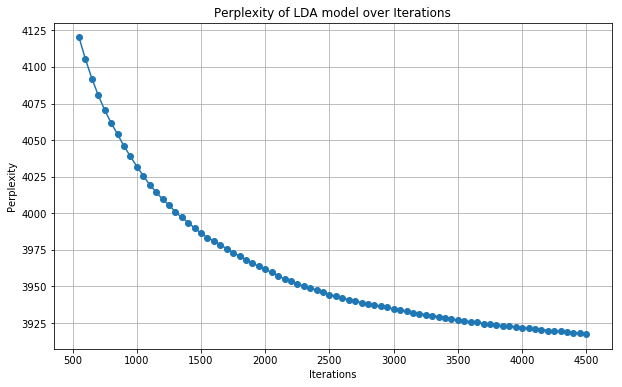

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

# Load the data from the csv file
performance = np.genfromtxt("perplexity.csv", delimiter=";", skip_header=1)

# Extract iterations and perplexity values
iterations = performance[:, 0]
perplexity = performance[:, 1]

# Plot
plt.figure(figsize=(10,6))
plt.plot(iterations, perplexity, marker='o')
plt.title('Perplexity of LDA model over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Perplexity')
plt.grid(True)
plt.show()

`topic_content(n)` method produces topic_description.csv file. The rows of this file contain the first `n` stems in each topic ranked according to their probability, using the final stored sample.

In [14]:
startTime = datetime.now()
ldaobj.topic_content(100)
print datetime.now() - startTime

0:48:52.806000


`dt_avg()` calculates an average of the matrices in `ldaobj.dt`. These are distributions of topics within each document. The result is saved in a dt.csv file.

In [15]:
startTime = datetime.now()
dt = ldaobj.dt_avg()
print datetime.now() - startTime

0:09:31.382000


`tt_avg()` calculates an average of the matrices in `ldaobj.tt`. These are average topics. The result is saved in a tt.csv file.

In [16]:
startTime = datetime.now()
tt = ldaobj.tt_avg()
ldaobj.dict_print()
print datetime.now() - startTime

0:02:27.426000


## Predicting topic distributions for articles in the test dataset

As the next step, I apply the previously estimated topic model to predict the topic distributions for articles in my test dataset.

In [17]:
startTime = datetime.now()

with open('stems_for_lda_test.pkl', 'rb') as f:
    stems_test = pickle.load(f)
    
print stems_test[0]
print datetime.now() - startTime

[u'umweltzon', u'grossstadt', u'autos', u'plakett', u'erlaubt', u'anbruch', u'neuen_jahres', u'durf', u'autos', u'koln', u'hannov', u'speziell', u'umweltplakett', u'innenstadt', u'fahr', u'januar', u'eingerichtet', u'sogenannt', u'umweltzon', u'gefahr', u'feinstaubbelast', u'luft', u'verring', u'hunderttaus', u'autofahr', u'angab', u'stadt', u'plakett', u'erworb', u'zumind', u'januar', u'droh', u'bussgeld', u'kennzeichn', u'fehlt', u'alt', u'autos', u'katalysator', u'erhalt', u'plakett', u'bestimmt', u'fahrzeug', u'gelt', u'jedoch', u'sondergenehm', u'laufe_des_jahres', u'stadt', u'beispiel', u'folg', u'automobilclub', u'adac', u'kritisiert', u'unterschied', u'regel', u'pruft', u'rechtliche_schritte', u'umweltzon', u'feinstaub', u'schadlich', u'atemweg', u'abgas', u'autos', u'industriebetrieb', u'heizung', u'verursacht', u'zulass', u'uberschreit', u'eu', u'grenzwert', u'mikrogramm', u'feinstaub', u'pro', u'kubikmet', u'luft', u'maximal', u'tag']
0:16:50.336000


In [18]:
startTime = datetime.now()

# Initialize a query object using the QueryGibbs method from the LDA module. 
queryobj = topicmodels.LDA.QueryGibbs(stems_test,ldaobj.token_key,ldaobj.tt) 

# Perform the query operation with 100 iterations to infer the topic distributions for our test data.
queryobj.query(100)

# Save the predicted topic distributions for the test data.
filename = 'predicted_topics.sav'
joblib.dump(queryobj, filename, compress=True) 

Sample 0 queried
Sample 1 queried
Sample 2 queried
Sample 3 queried
Sample 4 queried
Sample 5 queried
Sample 6 queried
Sample 7 queried
Sample 8 queried
Sample 9 queried


['predicted_topics.sav']

In [19]:
# Calculate the perplexity for the test data.
perplexity_query_test = queryobj.perplexity()

# Print the perplexity for the test data.
print perplexity_query_test

# Save the calculated perplexity values into a CSV file.
np.savetxt("perplexity_query_test.csv", perplexity_query_test, delimiter =  ".", fmt='%10.5f')

[4845.25836952 4844.77143304 4844.12027098 4843.63892633 4843.21836419
 4842.24813064 4842.40717771 4841.61709964 4840.69324643 4840.96824614]


In [22]:
import pandas as pd

# Compute the average document-topic distributions from the collected samples for the test data.
dt_query = queryobj.dt_avg()

# Concatenate the document-topic distributions of the training and test datasets into a single matrix.
dt_all_articles = np.concatenate((dt, dt_query), axis=0)

# Create a new DataFrame.
article_topic = pd.DataFrame()

# Fill the DataFrame with article-specific topic distributions.
for i in range(dt_all_articles.shape[1]):
    article_topic['T' + str(i)] = dt_all_articles[:,i]

# Save the DataFrame with article-specific topic distributions to a CSV file.
article_topic.to_csv('article_topic.csv', encoding='utf-8')

print datetime.now() - startTime

0:40:01.333000


## Daily topics

Now I collapse all articles for a particular day into one document, and then compute, using the estimated topic distributions, the topic frequencies for this newly formed document. I use 100 iterations in this re-sampling step.

In [23]:
import os
from ast import literal_eval
startTime = datetime.now()

# Set the path variable to point to the 'newspaper_data_processing' directory.
path = os.getcwd().replace('\\nowcasting_with_text\\topics', '\\newspaper_data_processing')

# Load pre-processed 'dpa' dataset from a CSV file.
dpa = pd.read_csv(path + '\\dpa\\' + 'dpa_prepro_final.csv', encoding = 'utf-8', sep=';', index_col = 0,  keep_default_na=False,
                   dtype = {'rubrics': 'str', 
                            'source': 'str',
                            'keywords': 'str',
                            'title': 'str',
                            'city': 'str',
                            'genre': 'str',
                            'wordcount': 'str'},
                  converters = {'paragraphs': literal_eval})

# Keep only the article texts and their respective publication dates.
dpa = dpa[['texts', 'day', 'month', 'year']]

# Load pre-processed 'SZ' dataset from a CSV file.
sz = pd.read_csv(path + '\\SZ\\' + 'sz_prepro_final.csv', encoding = 'utf-8-sig', sep=';', index_col = 0, dtype = {'newspaper': 'str',
                                                                                                 'newspaper_2': 'str',
                                                                                                 'quelle_texts': 'str',
                                                                                                 'page': 'str',
                                                                                                 'rubrics': 'str'})
sz.page = sz.page.fillna('')
sz.newspaper = sz.newspaper.fillna('')
sz.newspaper_2 = sz.newspaper_2.fillna('')
sz.rubrics = sz.rubrics.fillna('')
sz.quelle_texts = sz.quelle_texts.fillna('')

# Keep only the article texts and their respective publication dates.
sz = sz[['texts', 'day', 'month', 'year']]

# Load pre-processed 'Handelsblatt' dataset from a CSV file.
hb = pd.read_csv(path + '\\Handelsblatt\\' + 'hb_prepro_final.csv', encoding = 'utf-8-sig', sep=';', index_col = 0, dtype = {'kicker': 'str',
                                                                                                 'page': 'str',
                                                                                                 'series_title': 'str',
                                                                                                 'rubrics': 'str'})
hb.page = hb.page.fillna('')
hb.series_title = hb.series_title.fillna('')
hb.kicker = hb.kicker.fillna('')
hb.rubrics = hb.rubrics.fillna('')

# Keep only the article texts and their respective publication dates.
hb = hb[['texts', 'day', 'month', 'year']]

# Load pre-processed 'Welt' dataset from a CSV file.
welt = pd.read_csv(path + '\\Welt\\' + 'welt_prepro_final.csv', encoding = 'utf-8-sig', sep=';', index_col = 0, dtype = {'newspaper': 'str',
                                                                                                 'rubrics': 'str',
                                                                                                 'title': 'str'})
welt.title = welt.title.fillna('')
welt.rubrics = welt.rubrics.fillna('')

# Keep only the article texts and their respective publication dates.
welt = welt[['texts', 'day', 'month', 'year']]

# Concatenate the 'dpa', 'sz', 'hb', and 'welt' DataFrames into a single DataFrame 'data'.
data = pd.concat([dpa, sz, hb, welt])

# The number of articles in the final dataset.
print(len(data))

# Sort the data in chronological order.
data = data.sort_values(['year', 'month', 'day'], ascending=[True, True, True])

# Keep only the article publication dates.
data = data[['day', 'month', 'year']]

# Reset the index of the DataFrame.
data.reset_index(inplace=True, drop=True)
data.head()
print datetime.now() - startTime

3336299
0:04:30.938000


In [24]:
startTime = datetime.now()
import nltk
from nltk.tokenize import wordpunct_tokenize

# Merge the tokenized stems from both the training and test datasets into a single array.
stems_all = np.concatenate((stems_train, stems_test), axis=0)

# Convert the array of tokenized stems into a single string per document and add it as a new column in the DataFrame.
data.loc[:, 'stems'] = [' '.join(s) for s in stems_all] 

# Aggregate the stemmed strings up to the day level by concatenating all stems within each group of 'year','month', and 'day'.
aggtexts = data.groupby(['year', 'month', 'day'])['stems'].apply(lambda x: ' '.join(x)) 

# Tokenize each aggregated string in aggtexts.
aggtexts_tokens = map(wordpunct_tokenize, aggtexts)

# Initialize a query object with the tokenized stems from the aggregated texts.
queryobj = topicmodels.LDA.QueryGibbs(aggtexts_tokens,ldaobj.token_key,ldaobj.tt)

# Run the query on the aggregated texts.
queryobj.query(100)

# Save the predicted topic distributions for the aggregated texts.
filename = 'predicted_topics.sav'
joblib.dump(queryobj, filename, compress=True) 

Sample 0 queried
Sample 1 queried
Sample 2 queried
Sample 3 queried
Sample 4 queried
Sample 5 queried
Sample 6 queried
Sample 7 queried
Sample 8 queried
Sample 9 queried


['predicted_topics.sav']

In [25]:
# Calculate the perplexity for the aggregated texts.
perplexity_query_daily = queryobj.perplexity()

print perplexity_query_daily

# Save the perplexity of the aggregated texts to a CSV file.
np.savetxt("perplexity_query_daily.csv", perplexity_query_daily, delimiter =  ".", fmt='%10.5f')

[13458.34304879 13457.71130109 13457.38944259 13457.27613073
 13456.94408647 13456.1733085  13456.02234751 13455.39624485
 13455.07352545 13455.20382719]


In [26]:
# Compute the average document-topic distributions from the collected samples for the aggregated texts.
dt_query = queryobj.dt_avg()

# Create a DataFrame from the document-topic distributions, 
# using the day-level groups as the index and the topics as the column names.
aggtexts = pd.DataFrame(dt_query,index=aggtexts.index,columns=['T' + str(i) for i in xrange(queryobj.K)])

# Save the DataFrame with daily topic distributions to a CSV file.
aggtexts.to_csv("daily_topics.csv")

print datetime.now() - startTime

2:50:42.870000
